In [129]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
current_directory = os.getcwd()

credit_file = os.path.join(current_directory, 'credit.csv')

base_credit = pd.read_csv(credit_file)
base_credit2 = base_credit.drop(base_credit[base_credit['person_age'] < 0].index)

X_credit = base_credit2.iloc[:, [0,1,6,9,11]].values

y_credit = base_credit2.iloc[:, 8].values

scaler_base = StandardScaler()
X_credit = scaler_base.fit_transform(X_credit)

In [132]:
X_credit_training, X_credit_test, y_credit_training, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.3, random_state=0)

In [133]:
X_credit_training

array([[-0.43078263, -0.55917451, -0.25140362,  0.74729743, -0.44494161],
       [-0.58831303,  0.14399547, -1.04229388, -1.21936083, -0.69155444],
       [ 0.04180858,  0.38600056,  2.43762325,  1.02824861,  0.04828407],
       ...,
       [-0.90337383, -0.44488358, -0.09322557,  0.55999664, -0.93816728],
       [-0.74584343, -0.38841572,  0.06495248,  0.65364703, -0.93816728],
       [-0.74584343, -0.5174851 ,  0.21522163,  1.40285018, -0.93816728]])

In [134]:
knn_credit = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2)
knn_credit.fit(X_credit_training, y_credit_training)

KNeighborsClassifier(n_neighbors=20)

In [135]:
previsions = knn_credit.predict(X_credit_test)

In [136]:
accuracy_score(previsions, y_credit_test)

0.8365217391304348

0.8365217391304348

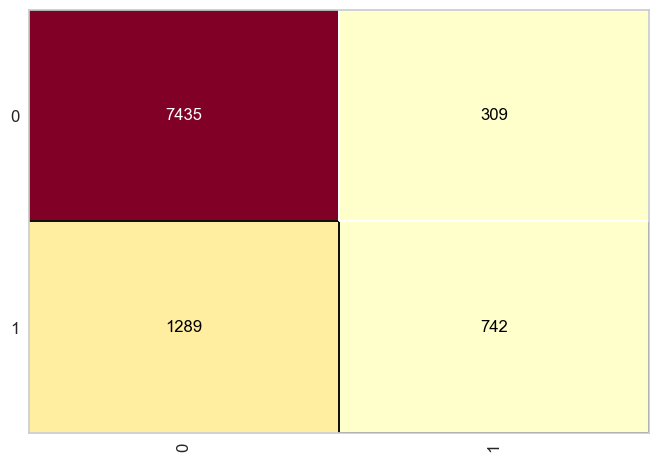

In [137]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_training, y_credit_training)
cm.score(X_credit_test, y_credit_test)